Começo importando as bibliotecas necessárias

In [19]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

Sobre o dataset:

data: Datas mensais de 2005 a Junho de 2019

consumo_total: Consumo total de energia energia elétrica na rede (MWh), mes a mes, segundo a EPE

consumo_total_YoY: Diferença percentual mês a mês calculada entre o mês atual e o mesmo mês do ano anterior.

pib_YoY : Dados trimestrais do crescimento do PIB, em relação ao mesmo mês do ano anterior, segundo o IPEA, que foram triplicados para cada mês do trimestre.

pesquisa_Industrial: Diferença percentual mês a mês calculada entre o mês atual e o mesmo mês do ano anterior. Com base na pesquisa industrial mensal, divulgada pelo IBGE.



In [60]:
energia = pd.read_csv(r'C:\Users\caeta\Desktop\PIBITI\baseTrabalhada1609.csv', encoding = 'UTF-8',sep = ";")

In [61]:
#Checando as primeiras informações
energia.iloc[0]

data                          Jan/05
consumo_total          28,375,437.44
consumo_total_YoY               5.18
pib_YoY                         4.18
pesquisa_Industrial          8.63262
Name: 0, dtype: object

In [62]:
#As linhas do começo
energia.head()

,data,consumo_total,consumo_total_YoY,pib_YoY,pesquisa_Industrial
0,Jan/05,"28,375,437.44",5.18,4.18,8.632619
1,Feb/05,"27,838,480.97",5.02,4.18,7.436657
2,Mar/05,"28,598,631.51",4.82,4.18,6.829897
3,Apr/05,"29,355,501.91",4.67,4.47,6.036410
4,May/05,"28,482,150.61",4.54,4.47,8.603845


In [63]:
#As do final
energia.tail()

,data,consumo_total,consumo_total_YoY,pib_YoY,pesquisa_Industrial
169,Feb/19,"41,195,735.58",5.36,0.46,-0.847210
170,Mar/19,"40,982,099.00",-0.13,0.46,-3.248994
171,Apr/19,"39,570,709.74",-2.59,1.01,-1.436782
172,May/19,"40,498,880.32",3.33,1.01,15.421035
173,Jun/19,"38,278,742.92",0.38,1.01,-3.280091


In [64]:
#Using describe to find out more about the dataset
energia.describe()

,consumo_total_YoY,pib_YoY,pesquisa_Industrial
count,174.000000,174.000000,174.000000
mean,2.611552,2.139828,0.853245
std,3.238387,3.375296,8.949336
min,-5.800000,-5.520000,-20.487433
25%,0.457500,0.140000,-4.983073
50%,2.825000,2.225000,2.726688
75%,4.662500,4.700000,7.145429
max,11.250000,9.210000,28.448276


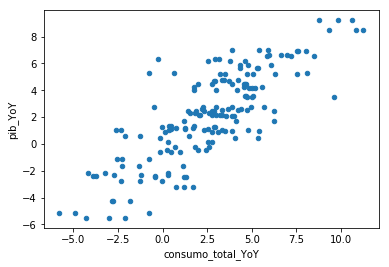

In [65]:
energia.plot(x='consumo_total_YoY', y='pib_YoY', kind='scatter')



In [66]:
df = energia[['consumo_total_YoY', 'pib_YoY']]

In [67]:
df.corr(method ='pearson')

,consumo_total_YoY,pib_YoY
consumo_total_YoY,1.000000,0.807342
pib_YoY,0.807342,1.000000


Um indíce maior que 0.7 indica correlação forte entre as duas séries

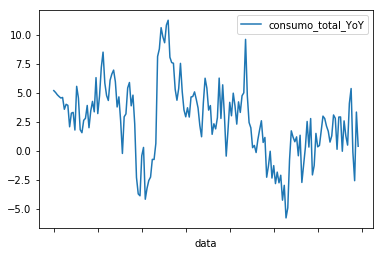

In [68]:
energia.plot(x='data', y= 'consumo_total_YoY', kind = 'line')

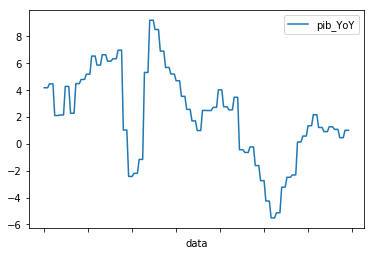

In [69]:
energia.plot(x='data', y= 'pib_YoY', kind = 'line')

Pode-se perceber visualmente a semelhança entre os dois gráficos

Agora que ja confirmamos a correlação positiva entre o consumo de energia e o crescimento do PIB podemos analisar as categorias:

In [70]:
categorias = pd.read_csv(r'C:\Users\caeta\Desktop\PIBITI\baseCategorias1609.csv', encoding = 'UTF-8',sep = ";")

In [71]:
categorias.head()

,data,consumo_Residencial,consumo_Industrial,consumo_Comercial,consumo_Outros,consumo_Cativo,diferenca_YoY_Residencial,diferenca_YoY_Industrial,diferenca_YoY_Comercial,diferenca_YoY_Outros,diferenca_YoY_Cativo,pib_YoY,pesquisa_Industrial
0,Jan/05,"7,118,537.83","12,650,753.12","4,492,543.97","4,113,602.52","22,597,880.58",4.98,5.35,5.84,4.30,-5.87,4.18,8.632619
1,Feb/05,"6,758,333.18","12,746,539.93","4,365,606.14","3,968,001.72","21,731,515.36",5.12,4.98,5.26,4.69,-8.05,4.18,7.436657
2,Mar/05,"6,865,215.67","13,065,261.41","4,552,519.80","4,115,634.63","22,328,433.92",4.01,3.62,8.29,6.30,-7.77,4.18,6.829897
3,Apr/05,"7,131,738.16","13,373,988.88","4,687,079.82","4,162,695.05","22,806,152.80",4.74,3.78,5.40,6.66,-8.08,4.47,6.036410
4,May/05,"6,718,147.45","13,292,319.64","4,377,603.69","4,094,079.83","21,916,975.72",3.72,3.58,6.62,6.93,-8.32,4.47,8.603845


In [72]:
categorias.describe()

,diferenca_YoY_Residencial,diferenca_YoY_Industrial,diferenca_YoY_Comercial,diferenca_YoY_Outros,diferenca_YoY_Cativo,pib_YoY,pesquisa_Industrial
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,4.110287,0.672184,4.292989,3.687874,0.903103,2.139828,0.853245
std,3.373942,5.199951,3.937800,2.941999,4.366946,3.375296,8.949336
min,-5.800000,-13.550000,-7.860000,-3.740000,-10.370000,-5.520000,-20.487433
25%,2.300000,-2.115000,1.965000,1.770000,-1.950000,0.140000,-4.983073
50%,4.410000,1.095000,4.710000,3.825000,1.180000,2.225000,2.726688
75%,6.357500,2.995000,6.947500,5.672500,4.245000,4.700000,7.145429
max,13.410000,15.790000,16.610000,13.280000,12.230000,9.210000,28.448276


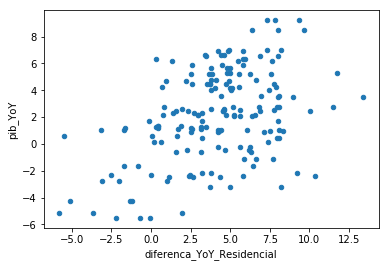

In [73]:
categorias.plot(x='diferenca_YoY_Residencial', y= 'pib_YoY', kind='scatter')

In [74]:
df2 = categorias[['diferenca_YoY_Residencial', 'pib_YoY']]

In [75]:
df2.corr(method = 'pearson')

,diferenca_YoY_Residencial,pib_YoY
diferenca_YoY_Residencial,1.000000,0.444024
pib_YoY,0.444024,1.000000


Podemos verificar que para o consumo residencial a correlação é baixa.

,diferenca_YoY_Industrial,pib_YoY
diferenca_YoY_Industrial,1.000000,0.795534
pib_YoY,0.795534,1.000000


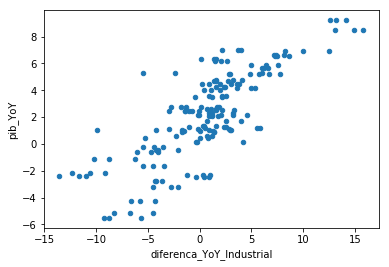

In [76]:
categorias.plot(x='diferenca_YoY_Industrial', y= 'pib_YoY', kind='scatter')
df3 = categorias[['diferenca_YoY_Industrial', 'pib_YoY']]
df3.corr(method = 'pearson')

,diferenca_YoY_Comercial,pib_YoY
diferenca_YoY_Comercial,1.000000,0.511406
pib_YoY,0.511406,1.000000


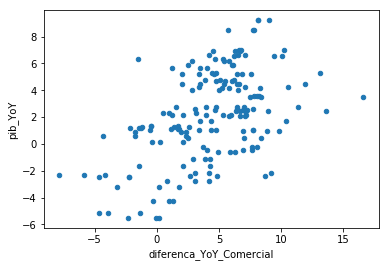

In [77]:
categorias.plot(x='diferenca_YoY_Comercial', y= 'pib_YoY', kind='scatter')
df4 = categorias[['diferenca_YoY_Comercial', 'pib_YoY']]
df4.corr(method = 'pearson')

,diferenca_YoY_Outros,pib_YoY
diferenca_YoY_Outros,1.00000,0.40303
pib_YoY,0.40303,1.00000


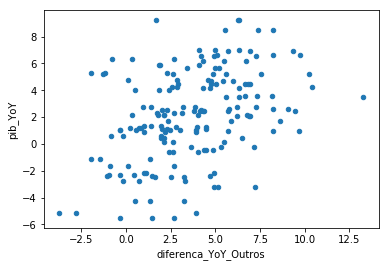

In [78]:
categorias.plot(x='diferenca_YoY_Outros', y= 'pib_YoY', kind='scatter')
df5 = categorias[['diferenca_YoY_Outros', 'pib_YoY']]
df5.corr(method = 'pearson')

,diferenca_YoY_Cativo,pib_YoY
diferenca_YoY_Cativo,1.000000,0.429164
pib_YoY,0.429164,1.000000


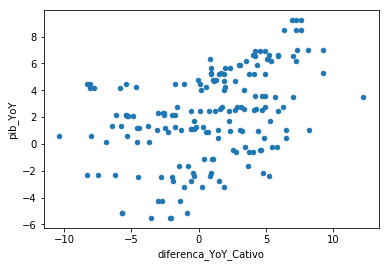

In [79]:
categorias.plot(x='diferenca_YoY_Cativo', y= 'pib_YoY', kind='scatter')
df6 = categorias[['diferenca_YoY_Cativo', 'pib_YoY']]
df6.corr(method = 'pearson')

Concluindo sobre as correlações das categorias: O consumo Total e o Industrial possuem correlação positiva forte, o consumo comercial apresenta uma correlação positiva moderada, enquanto o restante apresenta correlação positiva fraca.

,consumo_total_YoY,pesquisa_Industrial
consumo_total_YoY,1.000000,0.732383
pesquisa_Industrial,0.732383,1.000000


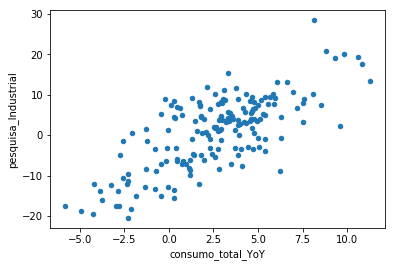

In [81]:
energia.plot(x='consumo_total_YoY', y='pesquisa_Industrial', kind='scatter')
df7 = energia[['consumo_total_YoY', 'pesquisa_Industrial']]
df7.corr(method = 'pearson')

,diferenca_YoY_Industrial,pesquisa_Industrial
diferenca_YoY_Industrial,1.00000,0.81816
pesquisa_Industrial,0.81816,1.00000


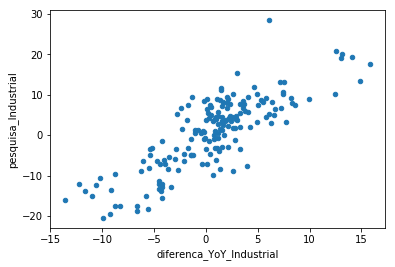

In [83]:
categorias.plot(x='diferenca_YoY_Industrial', y= 'pesquisa_Industrial', kind='scatter')
df8 = categorias[['diferenca_YoY_Industrial', 'pesquisa_Industrial']]
df8.corr(method = 'pearson')

Analisando também a Pesquisa Industrial podemos ver que a correlação é forte tanto com o consumo total quanto o consumo industrial.